# Construction salaire/localisation 2020

<u>salaires_2020.csv :</u> 


## Salaires et revenus d'activité

* CODGEO
* SUPERF	
* reg
* dep
* libelle	
* EU_circo	
* code_chef_lieu	
* chef_lieu_libelle	
* LIBELLE_DEP	
* LIBELLE_REG	
* Code_postal
* latitude 
* longitude
* PTOT    
* SNHM1820	: Salaire net horaire moyen 18 à 25 ans en 2020 (€)
* SNHM20	: Salaire net horaire moyen en 2020 (€)
* SNHM2620	: Salaire net horaire moyen 26 à 50 ans en 2020 (€)
* SNHM5020	: Salaire net horaire moyen plus de 50 ans en 2020 (€)
* SNHMC20	: Salaire net hor. Moy. Cadres sup. en 2020 (€)
* SNHME20	: Salaire net hor. moy. employés en 2020 (€)
* SNHMF1820	: Salaire net horaire moyen F 18 à 25 ans en 2020 (€)
* SNHMF20	: Salaire net horaire moyen F en 2020 (€)	
* SNHMF2620	: Salaire net horaire moyen F 26 à 50 ans en 2020 (€)
* SNHMF5020	: Salaire net horaire moyen F plus de 50 ans en 2020 (€)
* SNHMFC20	: Salaire net hor. moy. F cadres sup. en 2020 (€)
* SNHMFE20	: Salaire net hor. moy. F employés en 2020 (€)
* SNHMFO20	: Salaire net hor. moy. F ouvriers en 2020 (€)
* SNHMFP20	: Salaire net hor. moy. F prof inter. en 2020 (€)	
* SNHMH1820	: Salaire net horaire moyen H 18 à 25 ans en 2020 (€)	
* SNHMH20	: Salaire net horaire moyen H en 2020 (€)	
* SNHMH2620	: Salaire net horaire moyen H 26 à 50 ans en 2020 (€)
* SNHMH5020	: Salaire net horaire moyen H plus de 50 ans en 2020 (€)
* SNHMHC20	: Salaire net hor. moy. H cadres sup. en 2020 (€)	
* SNHMHE20	: Salaire net hor. moy. H employés en 2020 (€)	
* SNHMHO20	: Salaire net hor. moy. H ouvriers en 2020 (€)	
* SNHMHP20	: Salaire net hor. moy. H prof inter. en 2020 (€)	
* SNHMO20	: Salaire net hor. moy. ouvriers en 2020 (€)	
* SNHMP20	: Salaire net hor. moy. prof inter. en 2020 (€)	

In [2]:
# Suppression des warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Lecture fichier csv
salaires = pd.read_csv('../2020/salaires_2020.csv',encoding= "utf-8",index_col=0,
                       dtype={'reg':'str','Code_postal':'str','DEP':'str','PTOT':'int64'})
salaires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 2 to 34982
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODGEO             5421 non-null   object 
 1   SUPERF             5421 non-null   float64
 2   reg                5421 non-null   object 
 3   dep                5421 non-null   object 
 4   libelle            5421 non-null   object 
 5   EU_circo           5421 non-null   object 
 6   code_chef_lieu     5421 non-null   object 
 7   chef_lieu_libelle  5421 non-null   object 
 8   LIBELLE_DEP        5421 non-null   object 
 9   LIBELLE_REG        5421 non-null   object 
 10  Code_postal        5421 non-null   object 
 11  latitude           5421 non-null   float64
 12  longitude          5421 non-null   float64
 13  PTOT               5421 non-null   int64  
 14  SNHM20             5421 non-null   float64
 15  SNHMC20            5421 non-null   float64
 16  SNHMP20            5421

In [4]:
dict_columns = {'CODGEO': 'CODGEO','SUPERF':'superficie','reg':'no_region','dep':'no_dep','libelle':'nom_commune',
                'EU_circo':'EU_circo','code_chef_lieu': 'no_chef_lieu','chef_lieu_libelle':'nom_chef_lieu',
                'LIBELLE_DEP': 'nom_dep','LIBELLE_REG':'nom_region','Code_postal':'code_postal','latitude':'latitude',
                'longitude':'longitude','PTOT':'pop_tot'}
                
salaires = salaires.rename(columns=dict_columns)

In [5]:
import base64
from IPython.display import HTML

def create_download_link( df,filename,title):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = salaires
file = "salaires_new.csv"
create_download_link(df,file,"Download CSV file 1")


In [4]:
salaires.head(3)

CODGEO  superficie no_region no_dep        nom_commune EU_circo  \
2   01004       24.60        84     01  Ambérieu-en-Bugey  Sud-Est   
5   01007       33.55        84     01           Ambronay  Sud-Est   
12  01014       23.49        84     01             Arbent  Sud-Est   

   no_chef_lieu nom_chef_lieu nom_dep            nom_region  ...   SNHMHO20  \
2         69123          Lyon     Ain  Auvergne-Rhône-Alpes  ...  12.095672   
5         69123          Lyon     Ain  Auvergne-Rhône-Alpes  ...  12.881610   
12        69123          Lyon     Ain  Auvergne-Rhône-Alpes  ...  12.304387   

     SNHM1820   SNHM2620   SNHM5020  SNHMF1820  SNHMF2620  SNHMF5020  \
2   10.880315  15.072711  17.255747  10.291297  13.234401  14.192028   
5   10.544073  15.263487  16.961952  10.618428  14.034526  14.418987   
12  11.058325  14.116861  16.528222  10.295307  12.226430  13.932078   

    SNHMH1820  SNHMH2620  SNHMH5020  
2   11.286232  16.130620  19.226540  
5   10.487221  16.229187  19.324302  
12  11.623660  15.517659  18.409024  

[3 rows x 38 columns]

In [5]:
salaires.isna().sum()

CODGEO           0
superficie       0
no_region        0
no_dep           0
nom_commune      0
EU_circo         0
no_chef_lieu     0
nom_chef_lieu    0
nom_dep          0
nom_region       0
code_postal      0
latitude         0
longitude        0
pop_tot          0
SNHM20           0
SNHMC20          0
SNHMP20          0
SNHME20          0
SNHMO20          0
SNHMF20          0
SNHMFC20         0
SNHMFP20         0
SNHMFE20         0
SNHMFO20         0
SNHMH20          0
SNHMHC20         0
SNHMHP20         0
SNHMHE20         0
SNHMHO20         0
SNHM1820         0
SNHM2620         0
SNHM5020         0
SNHMF1820        0
SNHMF2620        0
SNHMF5020        0
SNHMH1820        0
SNHMH2620        0
SNHMH5020        0
dtype: int64

In [6]:
salaires.pop_tot.describe()

count    5.421000e+03
mean     1.040075e+04
std      3.834911e+04
min      1.977000e+03
25%      2.804000e+03
50%      4.231000e+03
75%      8.144000e+03
max      2.162598e+06
Name: pop_tot, dtype: float64

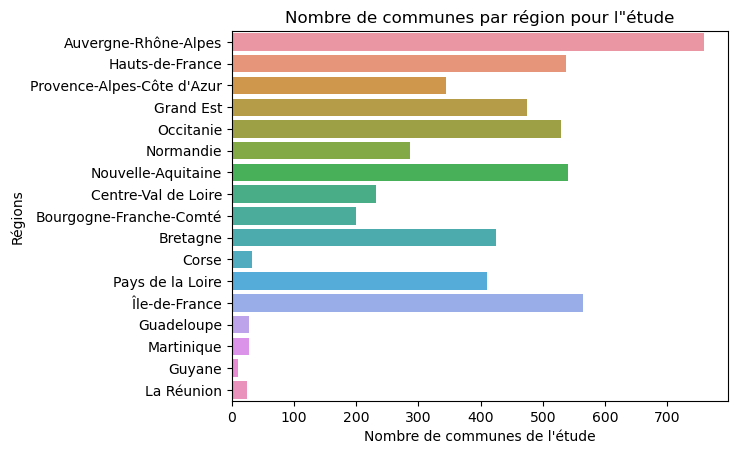

In [7]:
sns.countplot(y=salaires["nom_region"]);
plt.title('Nombre de communes par région pour l"étude')
plt.ylabel('Régions');
plt.xlabel("Nombre de communes de l'étude");


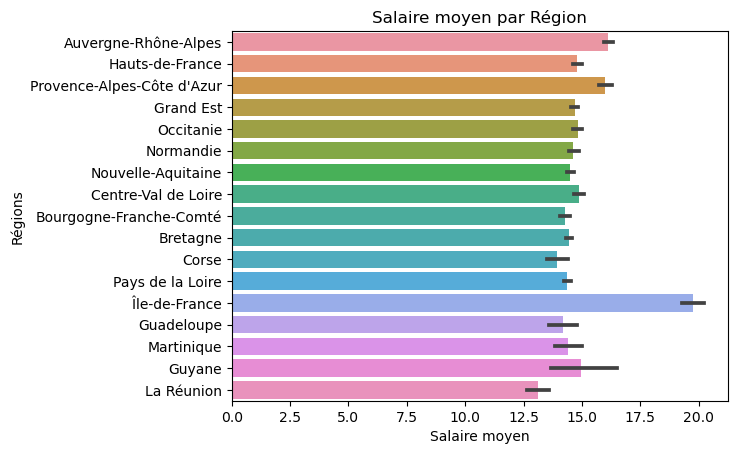

In [8]:
sns.barplot(x=salaires["SNHM20"],y=salaires["nom_region"],width=0.8);
plt.title('Salaire moyen par Région')
plt.ylabel('Régions');
plt.xlabel("Salaire moyen");

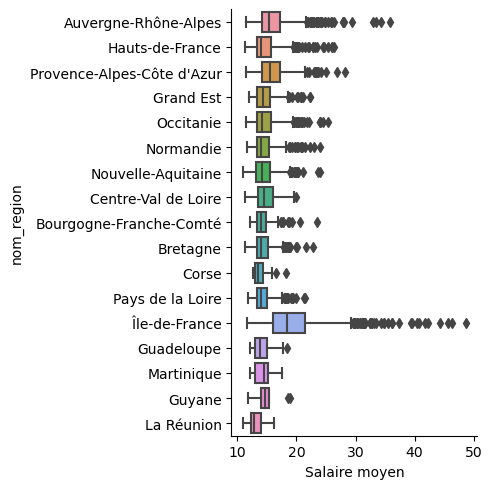

In [9]:

sns.catplot(data=salaires,x="SNHM20",y='nom_region',kind='box');
plt.xlabel("Salaire moyen");


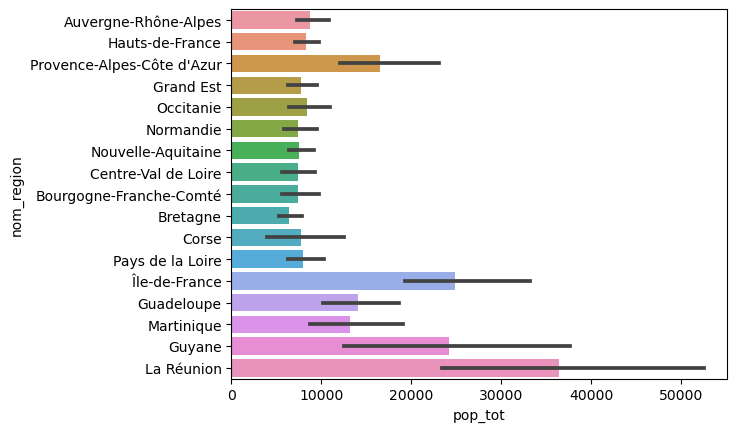

In [10]:
sns.barplot(x=salaires["pop_tot"],y=salaires["nom_region"],width=0.8);

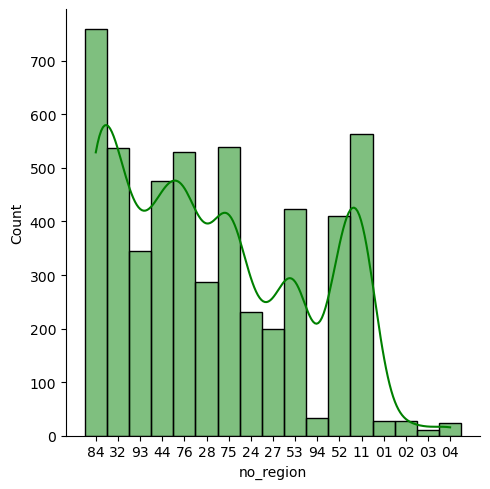

In [12]:
sns.displot(salaires["no_region"],bins=30, kde=True,color='green');

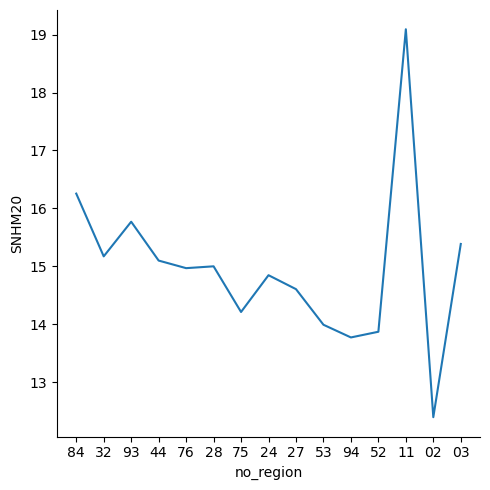

In [27]:
sns.relplot(y='SNHM20',x='no_region',data=salaires[(salaires['pop_tot']>1000) &  (salaires['pop_tot']<3000)],kind='line',ci=None);

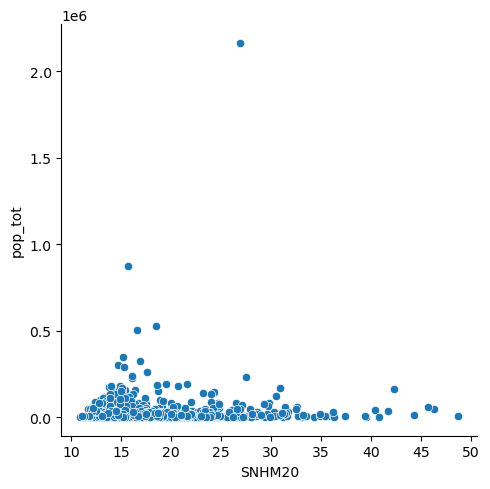

In [28]:
sns.relplot(y='pop_tot',x='SNHM20',data=salaires);

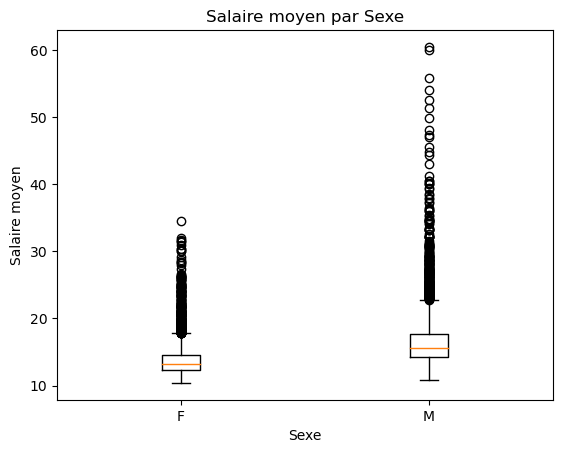

In [33]:
plt.boxplot([salaires.SNHMF20,salaires.SNHMH20],labels=['F','M']);
plt.title('Salaire moyen par Sexe')
plt.xlabel('Sexe');
plt.ylabel("Salaire moyen");
# sns.catplot(data=salaires,x='SNHMF20',y='duree',kind='box');